In [7]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset["train"].to_pandas()
df['job_posted_date']=pd.to_datetime(df.job_posted_date)
df["job_skills"]=df["job_skills"].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
#displaying top 10 skills for Data Scientists in the US, and also the 10 most in-demand skills for Data Scientists in the US.
df_US= df[(df['job_title_short']=='Data Scientist')& (df['job_country']=='United States')].copy()
df_US=df_US.dropna(subset=['salary_year_avg'])
df_US=df_US.explode('job_skills')
df_US
df_ds_US=df_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])


In [18]:
df_ds_highest_salary=df_ds_US.sort_values(by='median', ascending= False).head(10)
df_ds_demand=df_ds_US.sort_values(by='count', ascending= False).head(10)

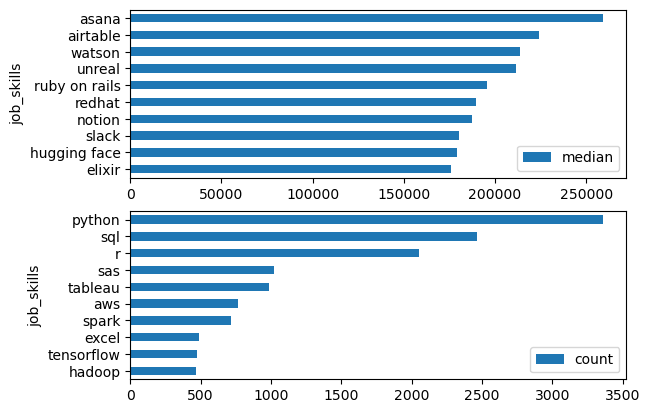

In [24]:
fig, ax=plt.subplots(2,1)
df_ds_highest_salary.plot(kind='barh', y='median', ax=ax[0])
ax[0].invert_yaxis()
df_ds_demand.plot(kind='barh', y='count', ax=ax[1])
ax[1].invert_yaxis()